<a href="https://colab.research.google.com/github/thuBv-123/B-i-V-Anh-Th-/blob/main/Bai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

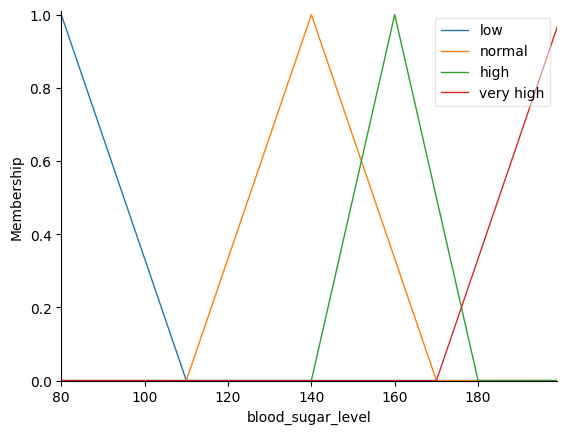

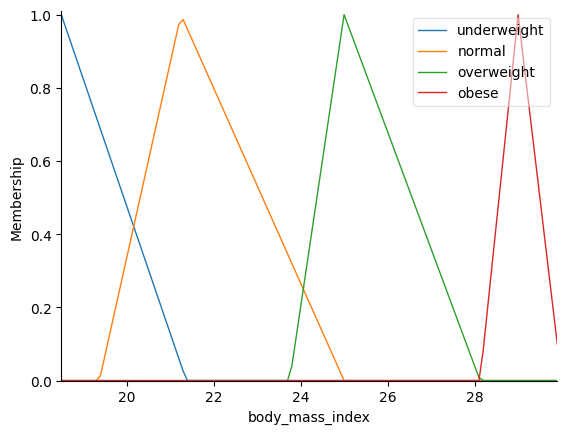

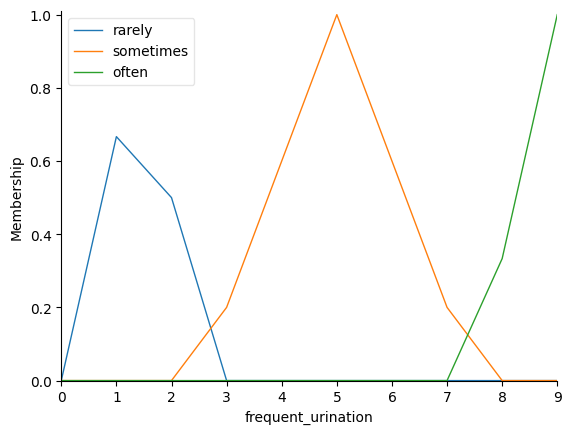

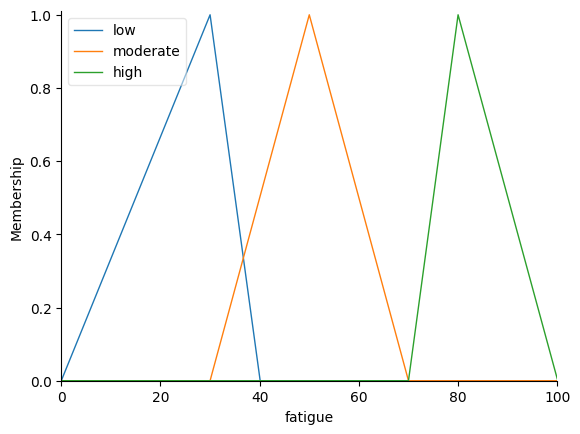

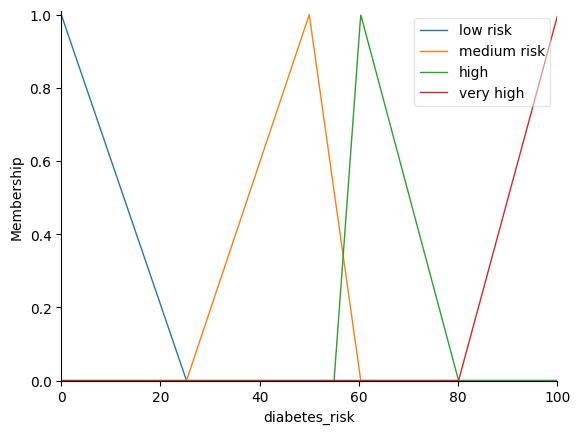

In [ ]:
# exam 1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_sugar_level = ctrl.Antecedent(np.arange(80,200,1),'blood_sugar_level')
body_mass_index = ctrl.Antecedent(np.arange(18.5,30,0.1),'body_mass_index')
frequent_urination = ctrl.Antecedent(np.arange(0,10,1),'frequent_urination')
fatigue =  ctrl.Antecedent(np.arange(0,100.1,0.1),'fatigue')
diabetes_risk = ctrl.Consequent(np.arange(0,100.1,0.1),'diabetes_risk')

blood_sugar_level['low']=fuzz.trimf(blood_sugar_level.universe,[80,80,110])
blood_sugar_level['normal']=fuzz.trimf(blood_sugar_level.universe,[110,140,170])
blood_sugar_level['high']=fuzz.trimf(blood_sugar_level.universe,[140,160,180])
blood_sugar_level['very high']=fuzz.trimf(blood_sugar_level.universe,[170,200,200])
body_mass_index['underweight']=fuzz.trimf(body_mass_index.universe,[18.5,18.5,21.375])
body_mass_index['normal']=fuzz.trimf(body_mass_index.universe,[19.375,21.25,25])
body_mass_index['overweight']=fuzz.trimf(body_mass_index.universe,[23.75,25,28.125])
body_mass_index['obese']=fuzz.trimf(body_mass_index.universe,[28.125,29,30])
frequent_urination['rarely']=fuzz.trimf(frequent_urination.universe,[0,1.5,2.5])
frequent_urination['sometimes']=fuzz.trimf(frequent_urination.universe,[2.5,5,7.5])
frequent_urination['often']=fuzz.trimf(frequent_urination.universe,[7.5,9,10])
fatigue['low']=fuzz.trimf(fatigue.universe,[0,30,40.1])
fatigue['moderate']=fuzz.trimf(fatigue.universe,[30,50,70])
fatigue['high']=fuzz.trimf(fatigue.universe,[70,80,100.1])
diabetes_risk['low risk']=fuzz.trimf(diabetes_risk.universe,[0,0,25.25])
diabetes_risk['medium risk']=fuzz.trimf(diabetes_risk.universe,[25.25,50,60.375])
diabetes_risk['high']=fuzz.trimf(diabetes_risk.universe,[55,60.375,80.1])
diabetes_risk['very high']=fuzz.trimf(diabetes_risk.universe,[80.1,100.1,100.1])


blood_sugar_level.view()
body_mass_index.view()
frequent_urination.view()
fatigue.view()
diabetes_risk.view()


53.21947799039369


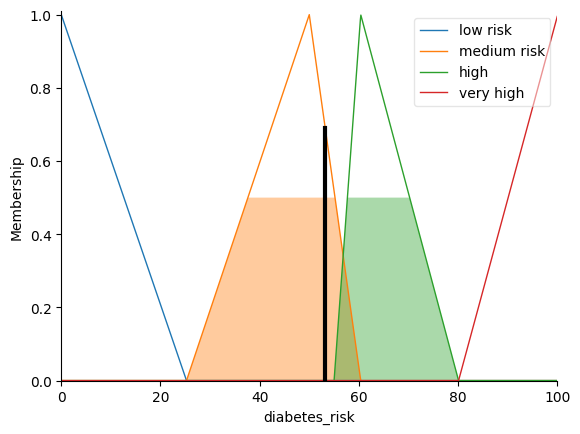

In [ ]:
rule1=ctrl.Rule(blood_sugar_level['very high']&frequent_urination['often'],diabetes_risk['very high'])
rule2=ctrl.Rule(blood_sugar_level['very high']&frequent_urination['sometimes'],diabetes_risk['high'])
rule3=ctrl.Rule(blood_sugar_level['high']&frequent_urination['often'],diabetes_risk['high'])
rule4=ctrl.Rule(blood_sugar_level['normal']&frequent_urination['rarely'],diabetes_risk['low risk'])

rule5=ctrl.Rule(blood_sugar_level['very high']&body_mass_index['obese'],diabetes_risk['very high'])
rule6=ctrl.Rule(blood_sugar_level['very high']&body_mass_index['overweight'],diabetes_risk['high'])
rule7=ctrl.Rule(blood_sugar_level['high']&body_mass_index['overweight'],diabetes_risk['high'])
rule8=ctrl.Rule(blood_sugar_level['high']&body_mass_index['underweight'],diabetes_risk['medium risk'])
rule9=ctrl.Rule(blood_sugar_level['normal']&body_mass_index['normal'],diabetes_risk['low risk'])

rule10=ctrl.Rule(blood_sugar_level['very high']&fatigue['high'],diabetes_risk['very high'])
rule11=ctrl.Rule(blood_sugar_level['high']&fatigue['high'],diabetes_risk['high'])
rule12=ctrl.Rule(blood_sugar_level['high']&fatigue['moderate'],diabetes_risk['medium risk'])
rule13=ctrl.Rule(blood_sugar_level['normal']&fatigue['low'],diabetes_risk['low risk'])


risk_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
risk = ctrl.ControlSystemSimulation(risk_ctrl)
risk.input['blood_sugar_level']=150
risk.input['body_mass_index']=18.75
risk.input['frequent_urination']=9
risk.input['fatigue']=60

risk.compute()
print(risk.output['diabetes_risk'])
diabetes_risk.view(sim=risk)